In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
env = gym.make('Taxi-v3')
action_space = env.action_space.n
state_space = env.observation_space.n
print(action_space, state_space)

6 500


In [3]:
for _ in range(1):
    state,info = env.reset()
    terminated = False
    truncated = False
    counter = 0
    while not terminated and not truncated:
        counter += 1
        action = env.action_space.sample(info["action_mask"])
        state, reward, terminated, truncated, info = env.step(action)
        # print(f"Step: {counter}, Action: {action}, State: {state}, Reward: {reward}, Terminated: {terminated}, Truncated: {truncated},info: {info}")

In [4]:
Q = np.zeros((state_space, action_space))

In [5]:
alpha = 0.5
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.1
gamma = 0.95
num_episodes = 10000

reward_per_episode = []

def epsilon_greedy_policy(state, info, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample(info["action_mask"])
    else:
        return np.argmax(Q[state])
    
for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    reward_sum = 0
    while not done:
        action = epsilon_greedy_policy(state,info,epsilon)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        reward_sum += reward
        best_next_action = np.argmax(Q[next_state])
        Q[state,action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])
        state = next_state
    reward_per_episode.append(reward_sum)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)


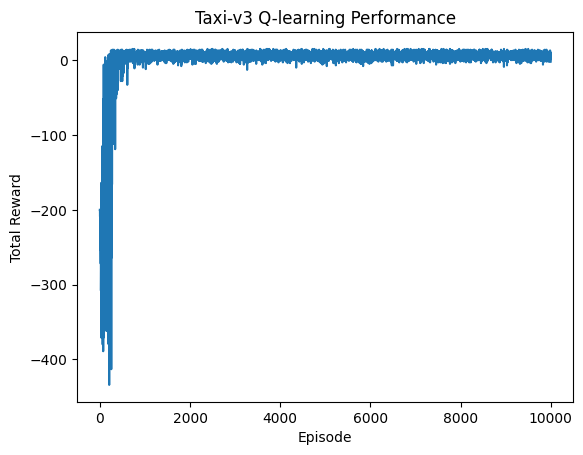

In [6]:
plt.plot(reward_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Taxi-v3 Q-learning Performance")
plt.show()